In [2]:
# --- LIBRERÍAS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# --- CONFIGURACIÓN DE PANDAS ---
pd.set_option('display.max_columns', None)

# --- CARGA DE DATOS ---
clients = pd.read_csv('../DATA/clients_202510280926.csv')
orders = pd.read_csv('../DATA/orders_202510280929.csv')
products = pd.read_csv('../DATA/products_202510280931.csv')

# --- VERIFICAR ---
print("Clientes:", clients.shape)
print("Órdenes:", orders.shape)
print("Productos:", products.shape)

# --- VISTAS RÁPIDAS ---
display(clients.head())
display(orders.head())
display(products.head())


Clientes: (2357, 15)
Órdenes: (82245, 10)
Productos: (1255, 6)


,client_id,first_name,last_name,gender,age,email,city,address,postal_code,country,citizenship,document_type,document_number,registration_date,last_seen
0,21e5c13d-1c9a-4d00-9164-b72302d5edef,Tristán,Rojas,M,42,tristán.rojas13@example.com,Rivera,Bulevar Artigas 3757,28289,Uruguay,Uruguay,CI,2719583-8,2025-05-02 00:00:00.000,2025-06-19 00:00:00.000
1,36e48bdd-db11-4abe-9526-cfc90e68924d,Óscar,Barranco,M,58,óscar.barranco13@example.com,Salto,Bulevar Artigas 3911,76237,Uruguay,Uruguay,CI,1445199-8,2023-02-24 00:00:00.000,2023-12-09 00:00:00.000
2,145c22df-3579-412e-bc12-b4fce70abaf3,Macario,Querol,M,28,macario.querol67@example.com,Rivera,Av. Rivera 206,30926,Uruguay,Uruguay,CI,8090293-5,2024-10-03 00:00:00.000,2025-05-03 00:00:00.000
3,90c4a925-e51f-4dac-9193-2d9aec97a472,Ramiro,Sanchez,M,19,ramiro.sanchez53@example.com,Salto,Av. 18 de Julio 6324,22676,Uruguay,Uruguay,CI,7022674-5,2025-01-13 00:00:00.000,2025-08-11 00:00:00.000
4,853f711a-4c36-40b4-b5d0-6207152cd793,Juan Francisco,Flor,M,36,juan francisco.flor68@example.com,Mercedes,Av. 18 de Julio 6301,20328,Uruguay,Uruguay,CI,5918715-9,2025-03-09 00:00:00.000,2025-03-21 00:00:00.000


,order_id,client_id,product_id,product_category,order_price,order_timestamp,order_status,payment_method,shipping_method,shipping_cost
0,1,6c5c87f2-49e9-4380-872d-71d9e3df63d6,P00333,Snacks,29.51,2023-01-01 23:51:55.000,delivered,bank_transfer,standard,3.51
1,2,0c8380cb-a64e-4090-8b23-d1ddf32630e0,P00929,Personal Care,23.40,2023-01-01 11:48:50.000,delivered,credit_card,standard,3.76
2,3,bf486527-8182-490e-9e10-c79232c6b0c9,P00768,Personal Care,94.41,2023-01-01 11:06:14.000,delivered,debit_card,express,10.42
3,5,6c5c87f2-49e9-4380-872d-71d9e3df63d6,P00610,Household,29.16,2023-01-01 20:55:35.000,delivered,credit_card,standard,6.05
4,6,7ac7a850-4f19-4c85-921b-b0e5ba921ee9,P00299,Snacks,76.22,2023-01-01 02:49:09.000,delivered,debit_card,express,14.08


,product_id,product_name,category,brand,last_updated,created_at
0,P00001,Lipton Ice Tea,Beverages,Unilever,2025-09-06 21:21:31.000,2025-04-06 21:21:31.000
1,P00002,Pepsi Max,Beverages,PepsiCo,2025-09-06 21:21:31.000,2025-05-02 21:21:31.000
2,P00003,Pepsi Max,Beverages,PepsiCo,2025-09-06 21:21:31.000,2024-10-02 21:21:31.000
3,P00004,Lipton Ice Tea,Beverages,Unilever,2025-09-06 21:21:31.000,2025-04-21 21:21:31.000
4,P00005,Pepsi Max,Beverages,PepsiCo,2025-09-06 21:21:31.000,2025-04-22 21:21:31.000


In [4]:
# --- VARIABLES EN CADA TABLA ---

print("🧍‍♂️ CLIENTS:")
print(clients.columns.tolist())
print("\n🛒 ORDERS:")
print(orders.columns.tolist())
print("\n📦 PRODUCTS:")
print(products.columns.tolist())


🧍‍♂️ CLIENTS:
['client_id', 'first_name', 'last_name', 'gender', 'age', 'email', 'city', 'address', 'postal_code', 'country', 'citizenship', 'document_type', 'document_number', 'registration_date', 'last_seen']

🛒 ORDERS:
['order_id', 'client_id', 'product_id', 'product_category', 'order_price', 'order_timestamp', 'order_status', 'payment_method', 'shipping_method', 'shipping_cost']

📦 PRODUCTS:
['product_id', 'product_name', 'category', 'brand', 'last_updated', 'created_at']


In [5]:
import pandas as pd

# ---------- FECHAS DE REFERENCIA ----------
CUTOFF = pd.Timestamp('2024-08-31')
MAX_DATE = pd.Timestamp('2024-12-31')
HORIZON = 90

# ---------- ASEGURAR FORMATOS DE FECHA ----------
orders['order_timestamp'] = pd.to_datetime(orders['order_timestamp'], errors='coerce')

# si no existe order_date, lo creamos
if 'order_date' not in orders.columns:
    orders['order_date'] = orders['order_timestamp'].dt.date

orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')
products['last_updated'] = pd.to_datetime(products['last_updated'], errors='coerce')

# ---------- FILTRAR HASTA 31/12/2024 ----------
orders = orders[orders['order_date'] <= MAX_DATE]
products = products[products['last_updated'] <= MAX_DATE]

# ---------- UNIR ORDERS CON PRODUCTS ----------
ord_prod = orders.merge(products[['product_id', 'category']], on='product_id', how='left')

# ---------- AGRUPAR POR CLIENTE ----------
agg = ord_prod.groupby('client_id').agg(
    n_orders=('order_id', 'count'),
    total_spent=('order_price', 'sum'),
    avg_spent=('order_price', 'mean'),
    total_shipping=('shipping_cost', 'sum'),
    avg_shipping=('shipping_cost', 'mean'),
    last_order=('order_date', 'max'),
    n_product_cat=('product_category', 'nunique'),
    top_product_cat=('product_category', lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA),
).reset_index()

# ---------- BASE DE CLIENTES ----------
base = clients[['client_id', 'gender', 'age']].copy()

# ---------- UNIR TODO ----------
dataset = base.merge(agg, on='client_id', how='left')

# ---------- CALCULAR RECENCY Y CHURN ----------
dataset['recency_days'] = (CUTOFF - dataset['last_order']).dt.days
dataset['churn'] = (
    dataset['last_order'].isna() |
    (dataset['recency_days'] > HORIZON)
).astype(int)

# ---------- COMPLETAR NULOS ----------
dataset = dataset.fillna({
    'n_orders': 0, 'total_spent': 0, 'avg_spent': 0,
    'total_shipping': 0, 'avg_shipping': 0,
    'n_product_cat': 0, 'n_prod_cat': 0,
    'recency_days': 10_000
})

# ---------- ORDENAR COLUMNAS ----------
cols = [
    'client_id', 'gender', 'age',
    'n_orders', 'total_spent', 'avg_spent',
    'total_shipping', 'avg_shipping',
    'n_product_cat', 'top_product_cat',
    'last_order', 'recency_days', 'churn'
]
dataset = dataset[cols]

print(dataset.shape)
dataset.head(10)


(2357, 13)


,client_id,gender,age,n_orders,total_spent,avg_spent,total_shipping,avg_shipping,n_product_cat,top_product_cat,last_order,recency_days,churn
0,21e5c13d-1c9a-4d00-9164-b72302d5edef,M,42,44.0,2306.18,52.413182,224.58,5.104091,5.0,Household,2024-12-16,-107.0,0
1,36e48bdd-db11-4abe-9526-cfc90e68924d,M,58,122.0,7236.93,59.319098,664.55,5.447131,5.0,Personal Care,2024-12-26,-117.0,0
2,145c22df-3579-412e-bc12-b4fce70abaf3,M,28,37.0,2076.58,56.123784,190.14,5.138919,5.0,Technology,2024-12-29,-120.0,0
3,90c4a925-e51f-4dac-9193-2d9aec97a472,M,19,13.0,614.39,47.260769,53.67,4.128462,3.0,Technology,2024-11-19,-80.0,0
4,853f711a-4c36-40b4-b5d0-6207152cd793,M,36,0.0,0.00,0.000000,0.00,0.000000,0.0,NaN,NaT,10000.0,1
5,22cdc8c6-e370-4fb5-aa37-91f1d7a6fba6,M,25,32.0,1876.15,58.629688,152.84,4.776250,5.0,Technology,2024-12-01,-92.0,0
6,b4f357f5-3b86-4aae-927f-0ee4da25baf9,F,47,60.0,2796.09,46.601500,272.52,4.542000,5.0,Personal Care,2024-12-31,-122.0,0
7,f05a7bb5-a3c2-4ee7-a5a1-2aab5f885183,M,46,15.0,808.03,53.868667,83.08,5.538667,5.0,Household,2024-12-30,-121.0,0
8,e66b3d22-5a63-43b4-86e3-df61f8e3c415,M,28,18.0,998.86,55.492222,107.13,5.951667,3.0,Technology,2024-12-12,-103.0,0
9,f2f46b96-3a9e-4b8e-8efc-d63c724256d9,M,24,61.0,2982.67,48.896230,293.67,4.814262,5.0,Technology,2024-12-26,-117.0,0


In [6]:
dataset['churn'].value_counts()

churn
0    2040
1     317
Name: count, dtype: int64

In [7]:
# --- NUEVAS VARIABLES (FEATURE ENGINEERING) ---
#Estas variables te permiten medir frecuencia, gasto y diversidad de consumo.

# Gasto promedio por orden (ya lo tenés como avg_spent, pero lo dejamos como referencia)
dataset['spent_per_order'] = dataset['total_spent'] / (dataset['n_orders'] + 1e-6)

# Proporción de costo de envío sobre gasto total (eficiencia del cliente)
dataset['shipping_ratio'] = dataset['total_shipping'] / (dataset['total_spent'] + 1e-6)

# Ticket promedio dividido por categorías compradas (nivel de diversificación)
dataset['avg_spent_per_cat'] = dataset['avg_spent'] / (dataset['n_product_cat'] + 1e-6)

# Relación entre cantidad de órdenes y antigüedad (frecuencia de compra)
dataset['orders_per_recency'] = dataset['n_orders'] / (dataset['recency_days'].abs() + 1e-6)

# Segmento de edad (para ver patrones demográficos)
dataset['age_group'] = pd.cut(
    dataset['age'],
    bins=[17, 30, 45, 60, 90],
    labels=['Joven', 'Adulto', 'Medio', 'Senior']
)

In [8]:
dataset.describe(include='all').transpose().head(15)


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
client_id,2357,2357,21e5c13d-1c9a-4d00-9164-b72302d5edef,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2357,2,M,1215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2357.0,NaN,NaN,NaN,34.921935,18.0,24.0,34.0,44.0,80.0,13.057754
n_orders,2357.0,NaN,NaN,NaN,34.893933,0.0,7.0,23.0,52.0,179.0,34.810373
total_spent,2357.0,NaN,NaN,NaN,1843.186513,0.0,376.98,1215.97,2749.56,10152.37,1849.069752
avg_spent,2357.0,NaN,NaN,NaN,50.559391,0.0,48.323214,52.412,56.488667,102.58,14.605174
total_shipping,2357.0,NaN,NaN,NaN,192.389945,0.0,39.23,126.95,287.25,1021.67,192.553154
avg_shipping,2357.0,NaN,NaN,NaN,5.273721,0.0,5.013152,5.4525,5.877273,14.11,1.535204
n_product_cat,2357.0,NaN,NaN,NaN,4.061095,0.0,3.0,5.0,5.0,5.0,1.465391
top_product_cat,2255,5,Technology,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\59899\AppData\Local\Temp\ipykernel_29540\2371901871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


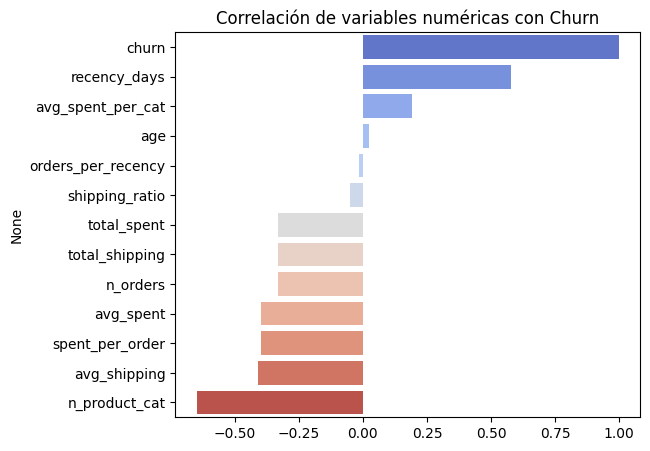

In [9]:
# Correlaciones numéricas con churn
#Esto te permite identificar cuáles variables podrían predecir mejor el abandono.

corr = dataset.corr(numeric_only=True)['churn'].sort_values(ascending=False)
plt.figure(figsize=(6,5))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Correlación de variables numéricas con Churn')
plt.show()


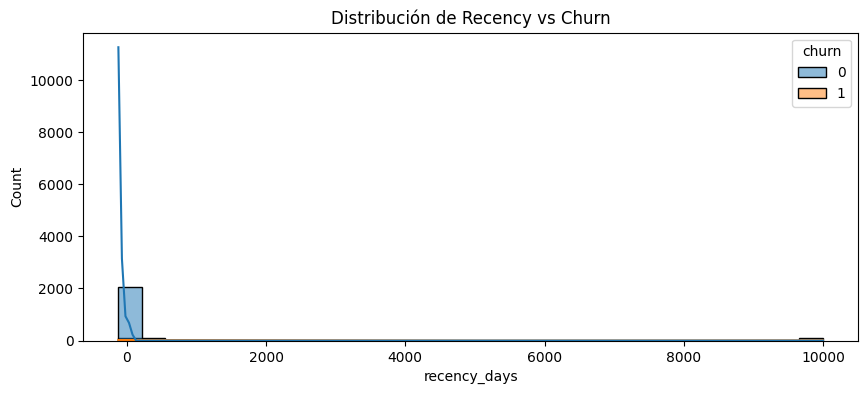

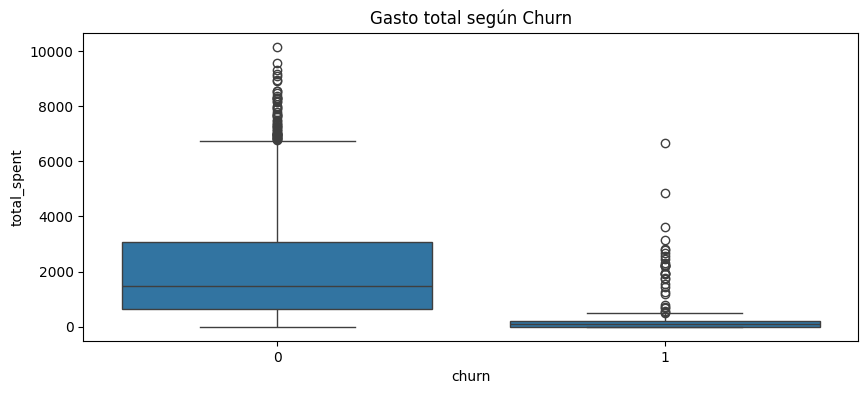

In [10]:
plt.figure(figsize=(10,4))
sns.histplot(data=dataset, x='recency_days', hue='churn', kde=True, bins=30)
plt.title('Distribución de Recency vs Churn')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=dataset, x='churn', y='total_spent')
plt.title('Gasto total según Churn')
plt.show()


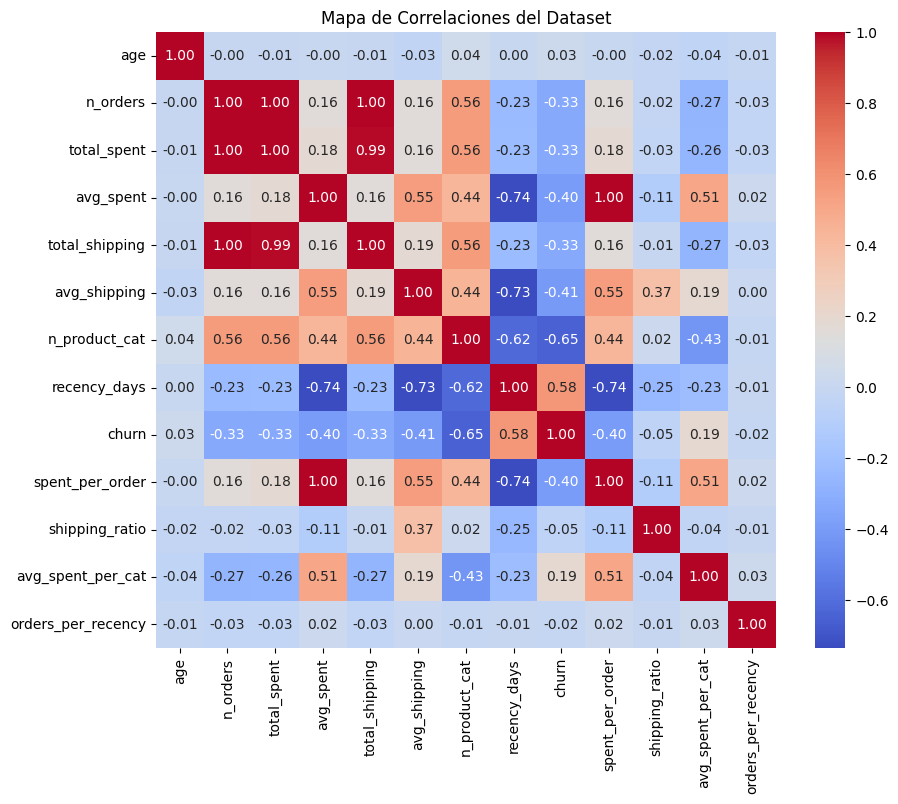

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlaciones del Dataset')
plt.show()
